# Epidemic Modelling 

This notebook outlines the Python code used in Chapter 3: Epidemic Modelling of the thesis. Below, we shall explore the discretzation of deterministic compartmental models using Euler's Method, stochastic epidemic models and the use of Gillespi's algorithm  and, finally, we shall discuss stochastic parameter diffusion and the use of Euler-Murayama approximation for stochastic-ODE's.

**Index:**
* [Compartmental Epidemic Models](#compartmental-epidemic-models)
* [The Effective Reproduction Number](#the-effective-reproduction-number)
* [Stochastic Epidemic Modelling and the Gillespie Algorithm](#stochastic-epidemic-modelling-and-the-gillespie-algorithm)
* [Diffusion Driven Epidemic Models](#diffusion-driven-epidemic-models)

## 

In [1]:
# Import all the ncesarry libraries
import pandas as pd
import numpy as np
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Compartmental Epidemic Models

In [2]:
def SIR_model(N, T, h, X0, params):
    """
    Simulates the deterministic SIR model using Euler's Forward Method

    Parameters:
    - N:        Total population size
    - T:        Total simulation time (in days)
    - h:        Time step (in days)
    - X0:       Array with initial state values in the order SIR
    - params:   Array with parameter values in the order beta, gamma, 
    
    Returns:
    - time:     Array of time points
    - S:        Array of susceptible individuals over time
    - I:        Array of infected individuals over time
    - R:        Array of recovered individuals over time
    """
    
    #Define total number of time steps, initial conditions and model parameters
    num_steps = int(T/h)
    S0, I0, R0 = X0
    beta, gamma = params
    
    #Initialize state variables
    S = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)
    time = np.arange(0,T,h)
    
    S[0] = S0
    I[0] = I0
    R[0] = R0    
    
    #Sequentially compute state values
    for t in range(1,num_steps):
        S[t] = S[t-1] + h*(-beta*S[t-1]*I[t-1]/N)
        I[t] = I[t-1] + h*(beta*S[t-1]*I[t-1]/N - gamma*I[t-1])
        R[t] = R[t-1] + h*(gamma*I[t-1])
    
    return time, S, I, R

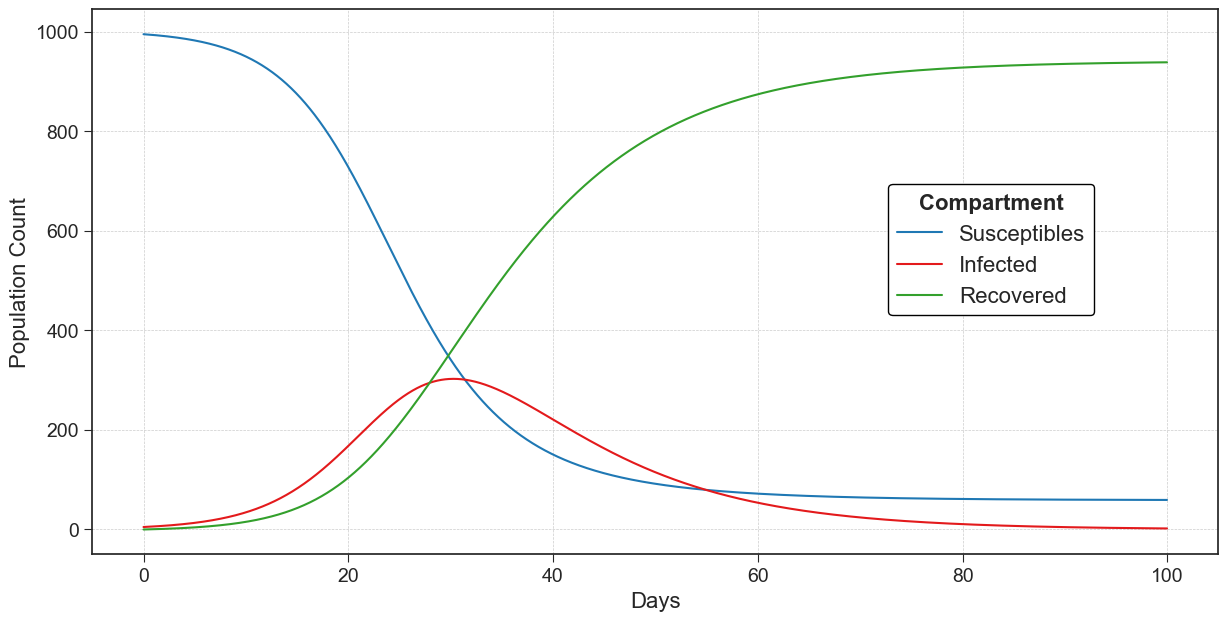

In [18]:
# EXAMPLE 1

N = 1000 #Total population
T = 100 #Total number of days to simulate
h = 1/24 #Step size for state computation
gamma = 0.1 #Recovery rate
beta = 0.3 #Infection rate 

#Initial conditions
I0 = 5
S0 = N - I0
R0 = 0

X0 = (S0, I0, R0)
params = (beta, gamma)

time, S,I,R = SIR_model(N, T, h, X0, params)

# Plot the results
plt.figure(figsize=(12,6))
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')

plt.plot(time, S, label='Susceptibles', color=colors[1])
plt.plot(time, I, label='Infected', color = colors[5])
plt.plot(time, R, label='Recovered', color=colors[3])

plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.legend(
    bbox_to_anchor=(0.9, 0.7), 
    fontsize=16, 
    title='Compartment', 
    title_fontproperties={'weight': 'bold', 'size': 16},
    frameon=True,                  
    fancybox=True,                 
    framealpha=1,                   
    edgecolor='black',              
    facecolor='white')
plt.tight_layout()
plt.xlabel('Days', fontsize=16)
plt.ylabel('Population Count', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [4]:
def SEIR_model(N, T, h, X0, params):
    """
    Simulates the deterministic SEIR model using Euler's Forward Method

    Parameters:
    - N:        Total population size
    - T:        Total simulation time (in days)
    - h:        Time step (in days)
    - X0:       Array with initial state values in the order SEIR
    - params:   Array with parameter values in the order beta, gamma, mu, sigma 
    
    Returns:
    - time:     Array of time points
    - S:        Array of susceptible individuals over time
    - I:        Array of infected individuals over time
    - R:        Array of recovered individuals over time
    """
    
    #Define total number of time steps, initial conditions and model parameters
    num_steps = int(T/h)
    S0, E0, I0, R0 = X0
    beta, gamma, sigma = params
    
    #Initialize state variables
    S = np.zeros(num_steps)
    E = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)
    time = np.arange(0,T,h)

    
    S[0] = S0
    E[0] = E0
    I[0] = I0
    R[0] = R0    
    
    #Sequentially compute state values
    for t in range(1,num_steps):
        S[t] = S[t-1] + h*(-beta*S[t-1]*I[t-1]/N)
        E[t] = E[t-1] + h*(beta*S[t-1]*I[t-1]/N - sigma*E[t-1])
        I[t] = I[t-1] + h*(sigma*E[t-1] - gamma*I[t-1])
        R[t] = R[t-1] + h*(gamma*I[t-1])
    
    return time, S, E, I, R

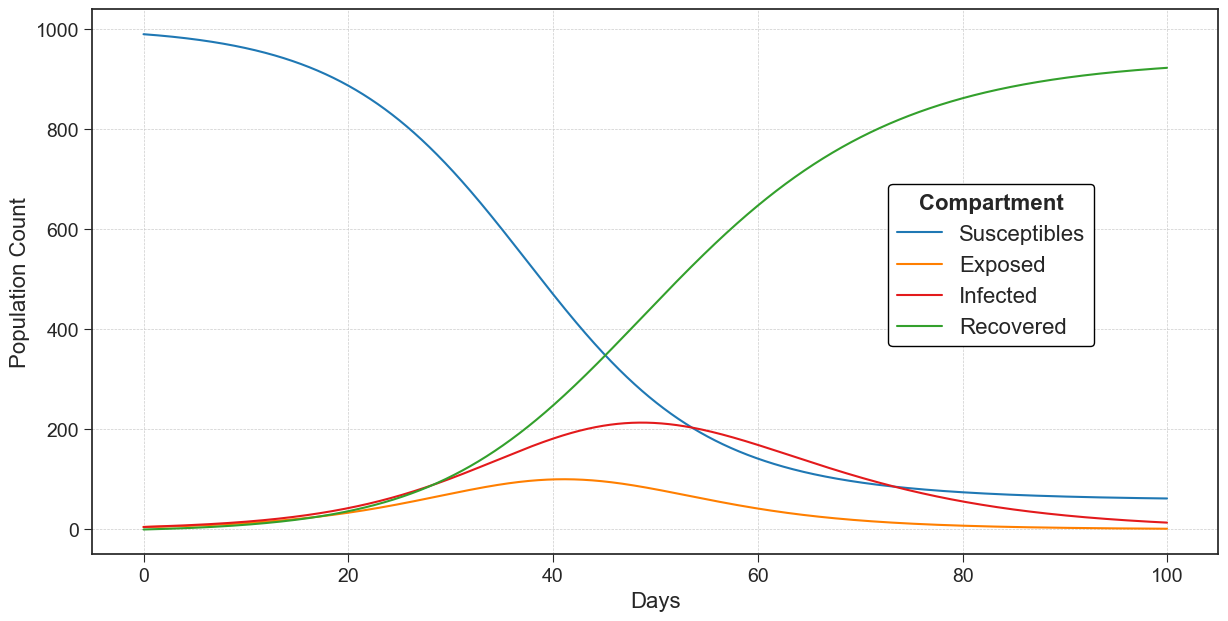

In [22]:
# EXAMPLE 2

N = 1000        #Total population
T = 100         #Total number of days to simulate
h = 1/24        #Step size for state computation
gamma = 0.1     #Recovery rate
beta = 0.3      #Infection rate
sigma = 0.25    #Latency rate 

#Initial conditions
I0 = 5
E0 = 5
S0 = N - I0 - E0
R0 = 0

X0 = (S0, E0, I0, R0)
params = (beta, gamma, sigma)

time,S,E,I,R = SEIR_model(N, T, h, X0, params)

#Plot the results
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')
plt.figure(figsize=(12,6))

plt.plot(time, S, label='Susceptibles', color=colors[1])
plt.plot(time, E, label='Exposed', color = colors[7])
plt.plot(time, I, label='Infected', color = colors[5])
plt.plot(time, R, label='Recovered', color=colors[3])

plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.legend(
    bbox_to_anchor=(0.9, 0.7), 
    fontsize=16, 
    title='Compartment', 
    title_fontproperties={'weight': 'bold', 'size': 16},
    frameon=True,                  
    fancybox=True,                 
    framealpha=1,                   
    edgecolor='black',              
    facecolor='white')
plt.tight_layout()
plt.xlabel('Days', fontsize=16)
plt.ylabel('Population Count', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [6]:
def seirds_model(N, T, h, X0, params):
    """
    Simulates the deterministic SEIRDS model using Euler's Forward Method

    Parameters:
    - N:        Total population size
    - T:        Total simulation time (in days)
    - h:        Time step (in days)
    - X0:       Array with initial state values in the order SEIRD
    - params:   Array with parameter values in the order alpha, beta, gamma, mu, sigma 
    
    Returns:
    - time:     Array of time points
    - S:        Array of susceptible individuals over time
    - I:        Array of infected individuals over time
    - R:        Array of recovered individuals over time
    """
    
    #Define total number of time steps, initial conditions and model parameters
    num_steps = int(T/h)
    S0, E0, I0, R0, D0 = X0
    alpha, beta, gamma, mu, sigma = params
    
    #Initialize state variables
    S = np.zeros(num_steps)
    E = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)
    D = np.zeros(num_steps)
    
    time = np.arange(0,T,h)

    S[0] = S0
    E[0] = E0
    I[0] = I0
    R[0] = R0    
    D[0] = D0
    
    #Sequentially compute state values
    for t in range(1,num_steps):
        S[t] = S[t-1] + h*(-beta*S[t-1]*I[t-1]/N + alpha*R[t-1])
        E[t] = E[t-1] + h*(beta*S[t-1]*I[t-1]/N - sigma*E[t-1])
        I[t] = I[t-1] + h*(sigma*E[t-1] - gamma*I[t-1] - mu*I[t-1])
        R[t] = R[t-1] + h*(gamma*I[t-1] - alpha*R[t-1])
        D[t] = D[t-1] + h*(mu*I[t-1])
    
    return time,S,E,I,R,D

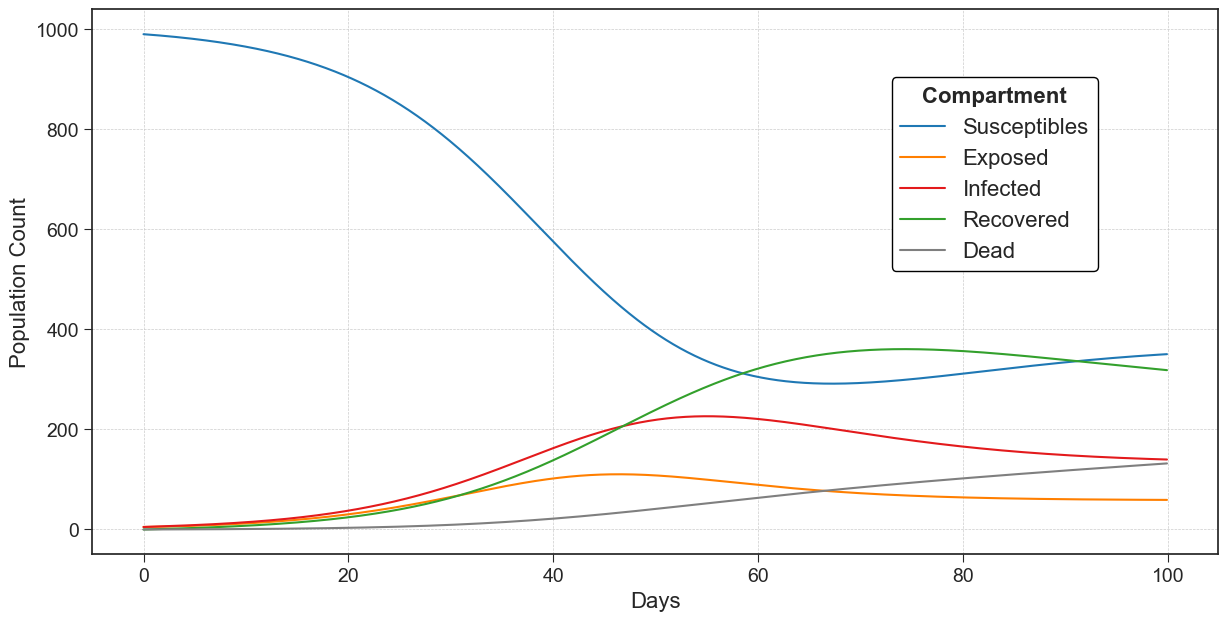

In [23]:
# EXAMPLE 3

N = 1000          #Total population
T = 100           #Total number of days to simulate
h = 1/10          #Step size for state computation
alpha = 1/20      #Reinfection rate
gamma = 0.1       #Recovery rate
beta = 0.3        #Infection rate
mu = 0.01         #Mortality Rate
sigma = 0.25      #Latency rate 

#Initial conditions
I0 = 5
E0 = 5
S0 = N - I0 - E0
R0 = 0
D0 = 0

X0 = (S0, E0, I0, R0, D0)
params = (alpha, beta, gamma, mu, sigma)

time,S,E,I,R,D = seirds_model(N, T, h, X0, params)

#Plot the results
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')
plt.figure(figsize=(12, 6))

plt.plot(time, S, label='Susceptibles', color=colors[1])
plt.plot(time, E, label='Exposed', color = colors[7])
plt.plot(time, I, label='Infected', color = colors[5])
plt.plot(time, R, label='Recovered', color=colors[3])
plt.plot(time, D, label='Dead', color='#7f7f7f')


plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.legend(
    bbox_to_anchor=(0.7, 0.5), 
    fontsize=16, 
    title='Compartment', 
    title_fontproperties={'weight': 'bold', 'size': 16},
    frameon=True,                  
    fancybox=True,                 
    framealpha=1,                   
    edgecolor='black',              
    facecolor='white')
plt.tight_layout()
plt.xlabel('Days', fontsize=16)
plt.ylabel('Population Count', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

## The Effective Reproduction Number

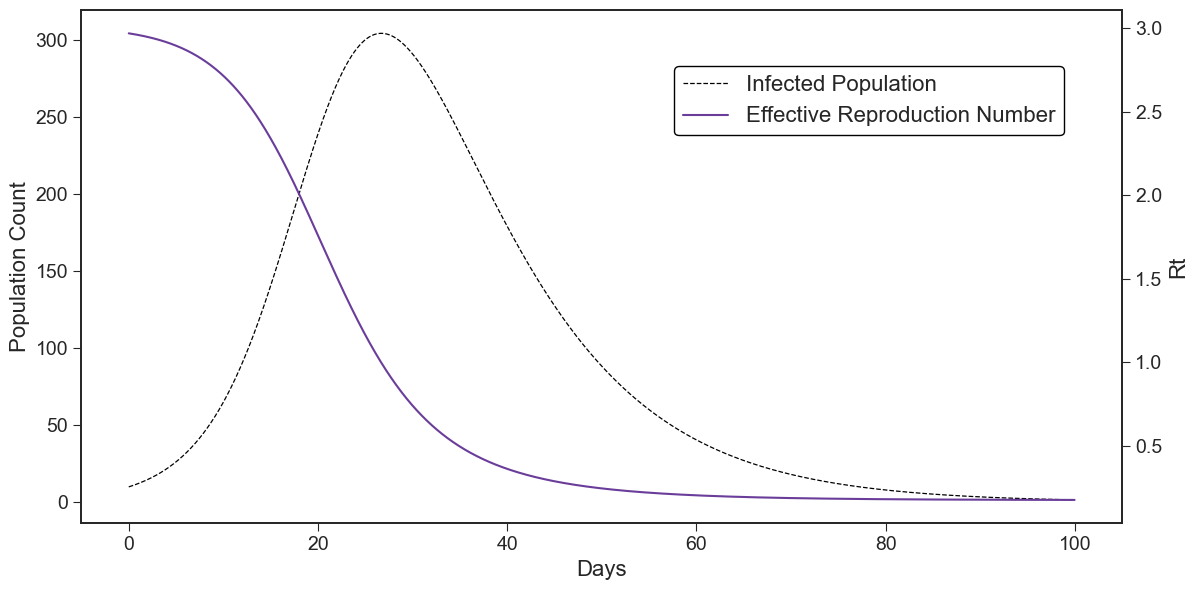

In [35]:
# Calculate the effective reproduction number from Example 1

N = 1000 #Total population
T = 100 #Total number of days to simulate
h = 1/24 #Step size for state computation
gamma = 0.1 #Recovery rate
beta = 0.3 #Infection rate 

#Initial conditions
I0 = 10
S0 = N - I0
R0 = 0

X0 = (S0, I0, R0)
params = (beta, gamma)
time,S,I,R = SIR_model(N, T, h, X0, params)


R_0 = beta / gamma
R_T = R_0 * S / N

# Create plot
fig, ax1 = plt.subplots(figsize=(12, 6))
plt.style.use('seaborn-v0_8-ticks')

ax1.plot(time, I, label="Infected Population", linestyle='--', linewidth=0.9, color='black')
ax1.tick_params(axis='y')
ax1.set_xlabel('Days', fontsize=16)
ax1.set_ylabel('Population Count',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

ax2 = ax1.twinx()
ax2.plot(time, R_T, label="Effective Reproduction Number", color=colors[9])
ax2.tick_params(axis='y')
ax2.set_ylabel('Rt', fontsize=16)

fig.tight_layout()
fig.legend(
    bbox_to_anchor=(0.9, 0.9), 
    fontsize=16, 
    title='', 
    title_fontproperties={'weight': 'bold', 'size': 16},
    frameon=True,                  
    fancybox=True,                 
    framealpha=1,                   
    edgecolor='black',              
    facecolor='white')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()


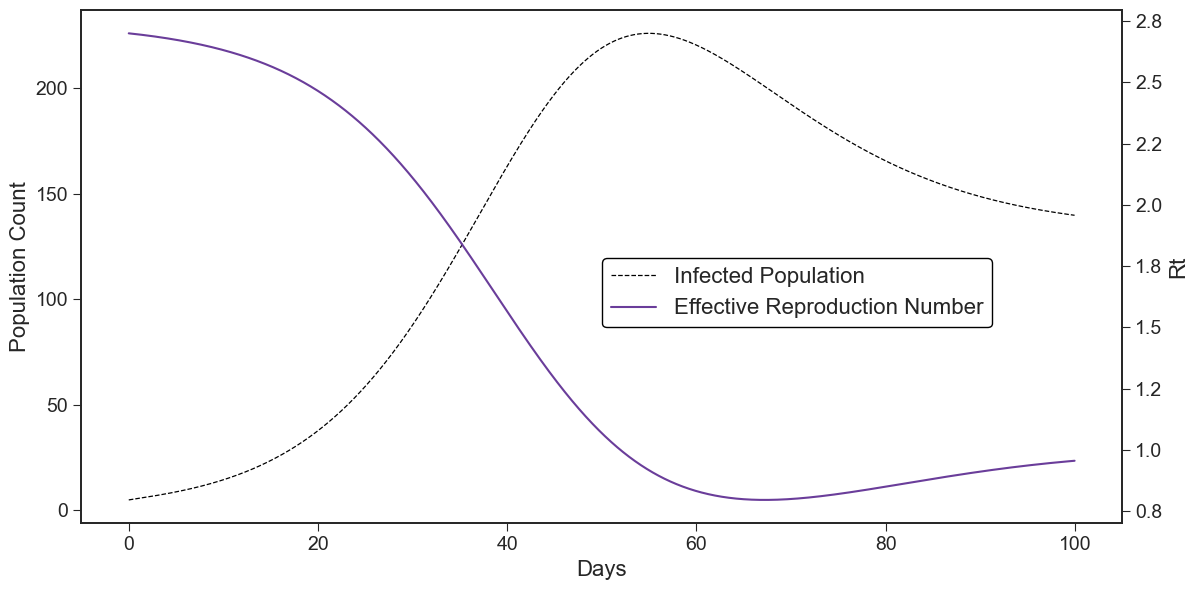

In [33]:
# Calculate the effective reproduction number from Example 3

N = 1000          #Total population
T = 100           #Total number of days to simulate
h = 1/24          #Step size for state computation
alpha = 1/20      #Reinfection rate
gamma = 0.1       #Recovery rate
beta = 0.3        #Infection rate
mu = 0.01         #Mortality Rate
sigma = 0.25      #Latency rate 

#Initial conditions
I0 = 5
E0 = 5
S0 = N - I0 - E0
R0 = 0
D0 = 0

X0 = (S0, E0, I0, R0, D0)
params = (alpha, beta, gamma, mu, sigma)

time,S,E,I,R,D = seirds_model(N, T, h, X0, params)

R_0 = beta/(gamma + mu)
R_T = R_0 * S/N

# Create plot
fig, ax1 = plt.subplots(figsize=(12, 6))
plt.style.use('seaborn-v0_8-ticks')

ax1.plot(time, I, label="Infected Population", linestyle='--', linewidth=0.9, color='black')
ax1.tick_params(axis='y')
ax1.set_xlabel('Days', fontsize=16)
ax1.set_ylabel('Population Count',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

ax2 = ax1.twinx()
ax2.plot(time, R_T, label="Effective Reproduction Number", color=colors[9])
ax2.tick_params(axis='y')
ax2.set_ylabel('Rt', fontsize=16)
ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))


fig.tight_layout()
fig.legend(
    bbox_to_anchor=(0.84, 0.58), 
    fontsize=16, 
    title='', 
    title_fontproperties={'weight': 'bold', 'size': 16},
    frameon=True,                  
    fancybox=True,                 
    framealpha=1,                   
    edgecolor='black',              
    facecolor='white')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

## Stochastic Epidemic Modelling and the Gillespie Algorithm

#### DTMC SIR model

In [10]:
def DTMC_SIR(N, beta, gamma, T, h, S0, I0, R0):
    """
    Simulates the DTMC SIR model for an epidemic.

    Parameters:
    - N: Total population size
    - beta: Infection rate
    - gamma: Recovery rate
    - T: Total simulation time (in days)
    - h: Time step (in days)
    - S0: Initial number of susceptible individuals
    - I0: Initial number of infected individuals
    - R0: Initial number of recovered individuals
    
    Returns:
    - S: Array of susceptible individuals over time
    - I: Array of infected individuals over time
    - R: Array of recovered individuals over time
    - time: Array of time points
    """
    
    num_steps = int(T/h)

    # Initialize arrays to store the simulation results
    S = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)

    # Set initial conditions
    S[0] = S0
    I[0] = I0
    R[0] = R0

    # Simulate the epidemic over time
    for t in range(1, num_steps):
        if I[t-1] > 0:  # If there are infected individuals, continue the simulation
            # Calculate infection and recovery probabilities
            P_infection = beta * I[t-1] / N
            P_recovery = gamma

            # Determine the number of new infections and recoveries
            new_infections = np.random.binomial(S[t-1], P_infection * h)
            new_recoveries = np.random.binomial(I[t-1], P_recovery * h)

            # Update the state variables
            S[t] = S[t-1] - new_infections
            I[t] = I[t-1] + new_infections - new_recoveries
            R[t] = R[t-1] + new_recoveries
        else:
            # If no infected individuals, epidemic has ended
            S[t] = S[t-1]
            I[t] = I[t-1]
            R[t] = R[t-1]

    # Create a time array
    time = np.arange(0, T, h)

    return time,S,I,R

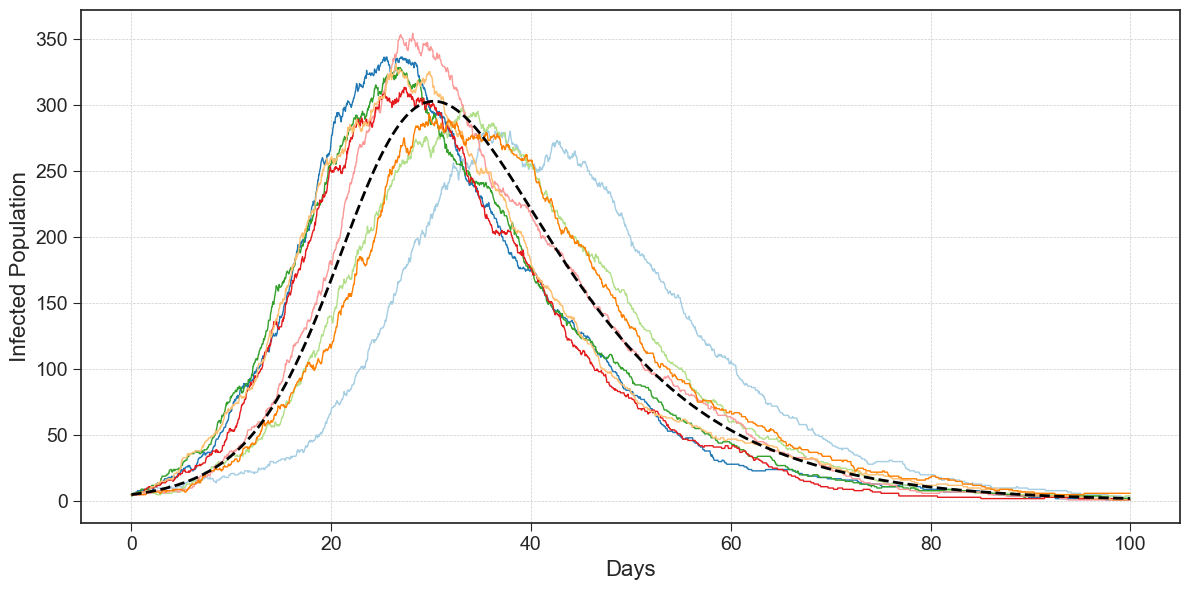

In [40]:
# Example of a DTMC simulation of the SIR model

N = 1000         # Total population size
beta = 0.3       # Infection rate
gamma = 0.1      # Recovery rate
T = 100          # Total simulation time (in days)
h = 1/24         # Time step (in days)
I0 = 5           # Initial number of infected individuals
S0 = N - I0      # Initial number of susceptible individuals
R0 = 0           # Initial number of recovered individuals

# Number of runs
num_runs = 8

# Store the results for each run
all_S = []
all_I = []
all_R = []

# Simulate the model 5 times
for i in range(num_runs):
    time,S,I,R = DTMC_SIR(N, beta, gamma, T, h, S0, I0, R0)
    all_S.append(S)
    all_I.append(I)
    all_R.append(R)
    
# Simulate baseline SIR model
X0 = (S0, I0, R0)
params = (beta, gamma)
_,_,I,_ = SIR_model(N, T, h, X0, params)

# Compare plots between DTMC and baseline deterministic model
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')


for i in range(num_runs):
    plt.plot(time, all_I[i], linewidth=1, color=colors[i])
plt.plot(time, I, linewidth=2, color='black', linestyle='--')

plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.xlabel('Days', fontsize=16)
plt.ylabel('Infected Population', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()


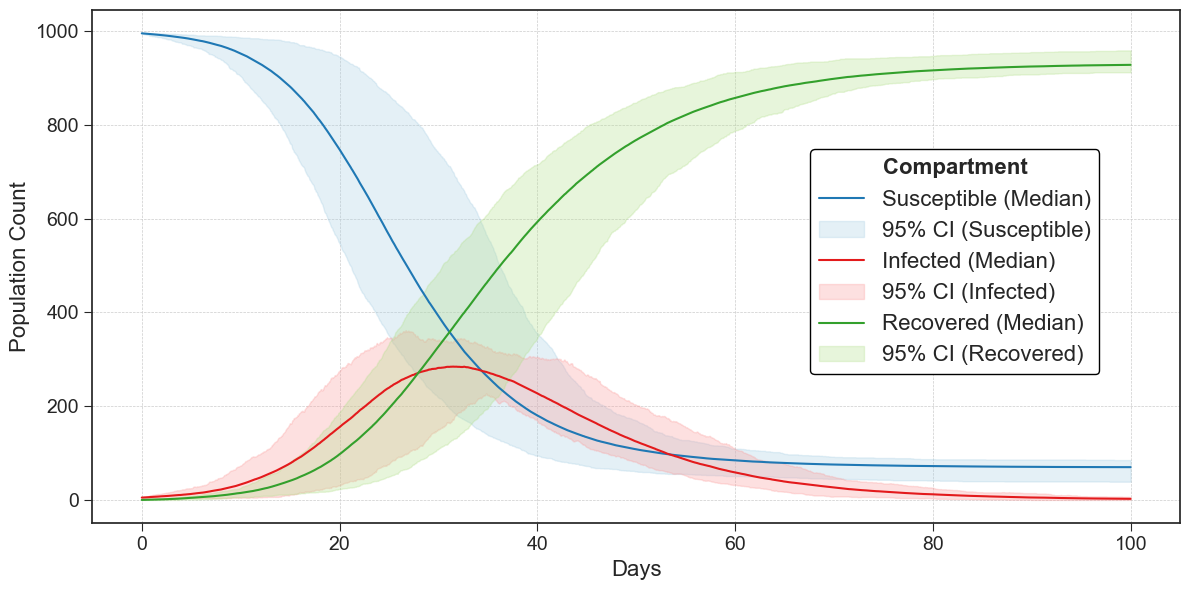

In [44]:
# CI for DTMC SIR model 

num_simulations = 100
num_steps = int(T / h)

# Initialize arrays to store the results of all simulations
S_simulations = np.zeros((num_simulations, num_steps))
I_simulations = np.zeros((num_simulations, num_steps))
R_simulations = np.zeros((num_simulations, num_steps))

# Run the simulations
for n in range(num_simulations):
    time, S, I, R = DTMC_SIR(N, beta, gamma, T, h, S0, I0, R0)
    S_simulations[n, :] = S
    I_simulations[n, :] = I
    R_simulations[n, :] = R

# Calculate the median and confidence intervals for each time step
S_median = np.mean(S_simulations, axis=0)
S_lower = np.percentile(S_simulations, 2.5, axis=0)
S_upper = np.percentile(S_simulations, 97.5, axis=0)

I_median = np.mean(I_simulations, axis=0)
I_lower = np.percentile(I_simulations, 2.5, axis=0)
I_upper = np.percentile(I_simulations, 97.5, axis=0)

R_median = np.mean(R_simulations, axis=0)
R_lower = np.percentile(R_simulations, 2.5, axis=0)
R_upper = np.percentile(R_simulations, 97.5, axis=0)

# Plot the results
plt.figure(figsize=(12, 6))
plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')

# Plot the Susceptible population with confidence intervals
plt.plot(time, S_median, label="Susceptible (Median)", color=colors[1])
plt.fill_between(time, S_lower, S_upper, color=colors[0], alpha=0.3, label='95% CI (Susceptible)')

# Plot the Infected population with confidence intervals
plt.plot(time, I_median, label="Infected (Median)", color=colors[5])
plt.fill_between(time, I_lower, I_upper, color=colors[4], alpha=0.3, label='95% CI (Infected)')

# Plot the Recovered population with confidence intervals
plt.plot(time, R_median, label="Recovered (Median)", color=colors[3])
plt.fill_between(time, R_lower, R_upper, color=colors[2], alpha=0.3, label='95% CI (Recovered)')

plt.xlabel('Days', fontsize=16)
plt.ylabel('Population Count', fontsize=16)
plt.legend(
    bbox_to_anchor=(0.65, 0.75), 
    fontsize=16, 
    title='Compartment', 
    title_fontproperties={'weight': 'bold', 'size': 16},
    frameon=True,                  
    fancybox=True,                 
    framealpha=1,                   
    edgecolor='black',              
    facecolor='white')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()

#### Gillespie Algorithm for a CTMC SIR Model

In [13]:
def GA_CTMC_SIR(N, beta, gamma, T, S0, I0, R0):
    """
    Simulates the CTMC SIR model using the Gillespie Algorithm

    Parameters:
    - N: Total population size
    - beta: Infection rate
    - gamma: Recovery rate
    - T: Total simulation time (in days)
    - h: Time step (in days)
    - S0: Initial number of susceptible individuals
    - I0: Initial number of infected individuals
    - R0: Initial number of recovered individuals
    
    Returns:
    - S: Array of susceptible individuals over time
    - I: Array of infected individuals over time
    - R: Array of recovered individuals over time
    - time: Array of time points
    """
    
    # Initialize arrays to store the simulation results
    time = []
    S_ts = []
    I_ts = []
    R_ts = []

    # Set initial conditions
    s = S[0]
    i = I[0]
    r = R[0]
    t = 0
    h = 0
    
    time.append(t)
    S_ts.append(s)
    I_ts.append(i)
    R_ts.append(r)
    
    # Simulate the epidemic over time
    while t < T and i > 0:
        # Compute propensitites
        a_1 = beta*s*i/N
        a_2 = gamma*i
        a_M = a_1 + a_2
        
        if a_M == 0:
            break
        
        # Compute time to next event
        u_1 = stats.uniform().rvs(1)[0]
        t += -np.log(u_1)/a_M 
        
        # Determine which event occurs
        u_2 = stats.uniform().rvs(1)[0]
        if u_2 < a_1/a_M:
            s -= 1
            i += 1
        else:
            i -= 1
            r += 1
            
        time.append(t)
        S_ts.append(s)
        I_ts.append(i)
        R_ts.append(r)

    return np.array(time), np.array(S_ts), np.array(I_ts), np.array(R_ts)

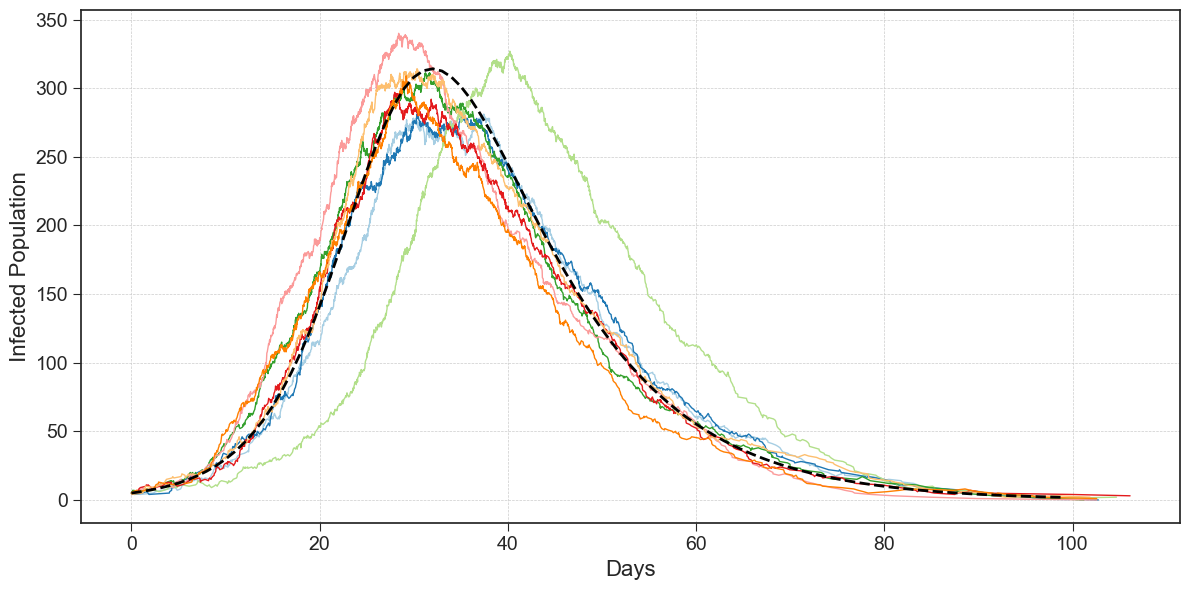

In [57]:
# Simulations for the CTMC SIR model using the Guillespie Algorithm

N = 1000         # Total population size
beta = 0.3       # Infection rate
gamma = 0.1      # Recovery rate
T = 100          # Total simulation time (in days)
h = 1         #Step size for state computation
I0 = 5           # Initial number of infected individuals
S0 = N - I0      # Initial number of susceptible individuals
R0 = 0           # Initial number of recovered individuals


# Number of runs
num_runs = 8

# Store the results for each run
all_time = []
all_S = []
all_I = []
all_R = []
all_time_diff = []

# Simulate the model num_runs times
for i in range(num_runs):
    time, S, I, R = GA_CTMC_SIR(N, beta, gamma, T, S0, I0, R0)
    all_time.append(time)
    all_S.append(S)
    all_I.append(I)
    all_R.append(R)
    all_time_diff.append(np.diff(time))
    
# Compare plots between DTMC and baseline deterministic model
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')

# Simulate baseline SIR model
X0 = (S0, I0, R0)
params = (beta, gamma)
_,_,I,_ = SIR_model(N, T, h, X0, params)

for i in range(num_runs):
    plt.plot(all_time[i], all_I[i], linewidth=1, color=colors[i])
    
plt.plot(np.arange(0, T, h), I, linewidth=2, color='black', linestyle='--')

plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.xlabel('Days', fontsize=16)
plt.ylabel('Infected Population', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()

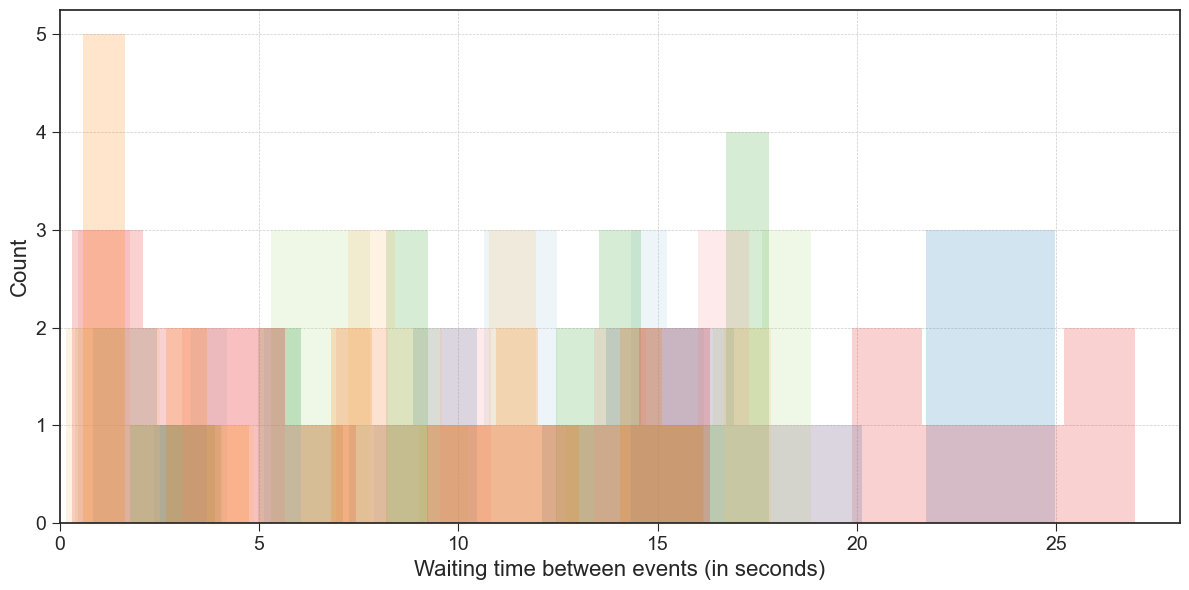

In [59]:
# Histogram of waiting time in seconds across each simulation

plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')
for i in range(num_runs):
    filtered = all_time_diff[i][all_time_diff[i] < np.percentile(all_time_diff[i],0.99)] # Truncated at 99% due to large waiting times at the begining & end of the infection curve
    plt.hist(filtered*24*60*60, linewidth=1, color=colors[i], alpha=0.2, bins=15)
    
plt.ylabel('Count', fontsize=11)
plt.xlabel('Waiting Time Between Events (in seconds)', fontsize=11)

plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.xlabel('Waiting time between events (in seconds)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.xlim(0,28.1)
plt.show()

## Diffusion Driven Epidemic Models

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def EM_BMSIR_model(N, gamma, sigma, X0, S0, I0, R0, T, h):
    """
    Simulates the Euler-Maruyama method for the Brownian Motion SIR model 
    
    Parameters:
    - N: Total population size
    - gamma: Recovery rate
    - sigma: Volatility of the stochastic process for X (determining beta)
    - X0: Initial value of X (drives beta)
    - S0: Initial number of susceptible individuals
    - I0: Initial number of infected individuals
    - R0: Initial number of recovered individuals
    - T: Total simulation time (in days)
    - h: Time step size (in days)
    
    Returns:
    - time: Array of time points
    - S: Array of susceptible individuals over time
    - I: Array of infected individuals over time
    - R: Array of recovered individuals over time
    - beta_t: Array of beta values (log-transformed X values)
    """
    
    # Number of time steps
    num_steps = int(T / h)
    
    # Initialize arrays to store results
    time = np.linspace(0, T, num_steps)
    S = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)
    beta = np.zeros(num_steps)
    X = np.zeros(num_steps)
    
    # Set initial conditions
    S[0], I[0], R[0] = S0, I0, R0
    X[0] = X0
    beta[0] = np.log(X[0])
    
    # Simulate the SIR model with stochastic beta using Euler-Maruyama method
    for t in range(1, num_steps):
        # Update the SIR compartments using Euler's method with the updated beta_t
        S[t] = S[t-1] + - beta[t-1] * (S[t-1] * I[t-1] / N) * h
        I[t] = I[t-1] + (beta[t-1] * (S[t-1] * I[t-1] / N) - gamma * I[t-1]) * h
        R[t] = R[t-1] + gamma * I[t-1] * h 
        
        # Sample Brownian increment
        dB = stats.norm().rvs(1)[0]
        
        # Update X using Euler-Maruyama method
        X[t] = X[t-1] + sigma * np.sqrt(h) * dB
        
        # Update beta (infection rate) as a log-transformation of X
        beta[t] = np.log(X[t])
    return time, S, I, R, beta

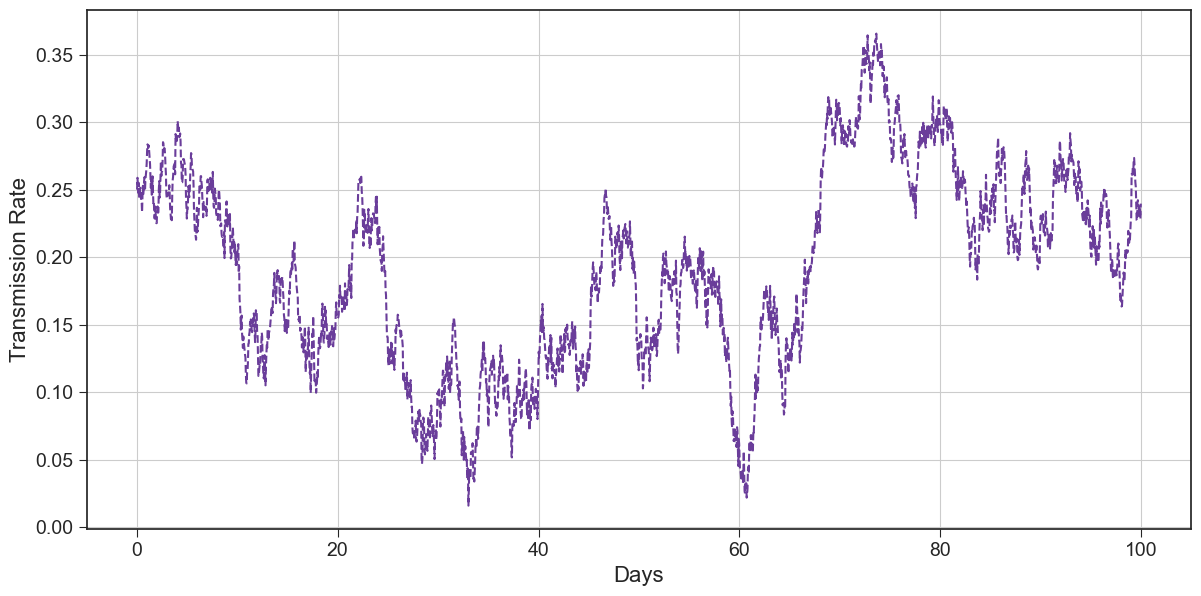

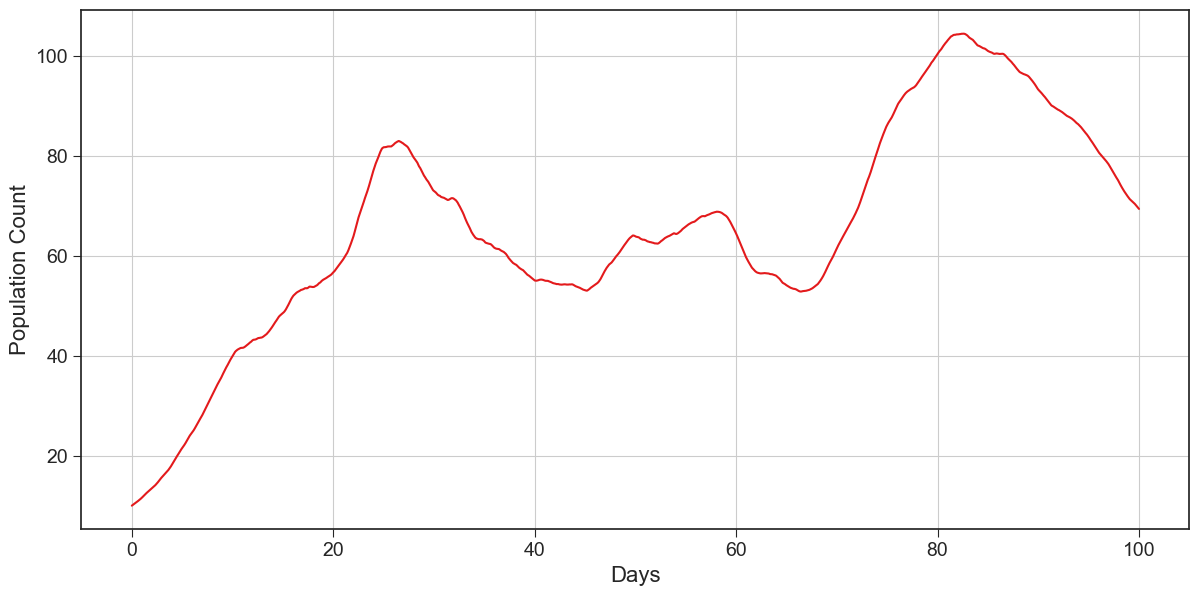

In [89]:
# Example parameters
N = 1000             # Total population size
gamma = 0.1          # Recovery rate
sigma = 0.05         # Volatility of the stochastic process for X
X0 = np.exp(0.25)    # Initial value for X (drives beta)
I0 = 10               # Initial number of infected individuals
S0 = N - I0          # Initial number of susceptible individuals
R0 = 0               # Initial number of recovered individuals
T = 100              # Total simulation time (in days)
h = 1/24             # Time step size (in days)

# Simulate the model
time, S, I, R, beta_t = EM_BMSIR_model(N, gamma, sigma, X0, S0, I0, R0, T, h)


colors = sns.color_palette('Paired')

plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-ticks')
plt.plot(time, beta_t, label="Beta (log-transformed X)", color=colors[9], linestyle='--', linewidth=1.5)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Transmission Rate', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

# Plot the results
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-ticks')
#plt.plot(time, S, label="Susceptible", color=colors[1])
plt.plot(time, I, label="Infected", color=colors[5])
#plt.plot(time, R, label="Recovered", color=colors[3])
plt.xlabel('Days', fontsize=16)
plt.ylabel('Population Count', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()
